# Singular Value Decomposition

We've seen eigendecomposition for square matrices but it is worth noting that not all matrices are square. What do we do in this instance?

Well, there is the singular value decomposition which takes the following form:

$$A = U \Sigma V^T$$

Where $U$ is an orthonormal matrix containing the basis for the eigenvectors that span the column space of A, $V$ contains the orthonormal basis for the row space of A and Sigma contains singular values combining the two.

How do we calculate it? By taking the eigendecompositions of $A^TA$ and $AA^T$

$$A^TA = (U \Sigma V^T)^T U \Sigma V^T$$
$$A^TA = V \Sigma U^T U \Sigma V^T$$
$$A^TA = V\Sigma^2 V^T$$

Note that since V^T is orthonormal, $V^T = V^{-1}$. Thus the singular value matrix is the square root of the eigenvalue diagonal Matrix (D).

If we do the same for $AA^T$, we get $A^TA = U\Sigma^2 U^T$.

Thus, we can combine the pieces to create the SVD.

In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Generate random tall matrix
A = np.random.rand(3, 2)

A

array([[0.36945789, 0.38064963],
       [0.20677102, 0.35879702],
       [0.82707164, 0.70886897]])

In [3]:
U, D, V_T = la.svd(A)

U, D, V_T

(array([[-0.41614598, -0.16914628, -0.89342715],
        [-0.31160042, -0.89652697,  0.3148723 ],
        [-0.85424101,  0.40942512,  0.32038004]]),
 array([1.27357998, 0.13198326]),
 array([[-0.72606109, -0.6876302 ],
        [ 0.6876302 , -0.72606109]]))

In [4]:
# Convert D to appropriate matrix
Z = np.zeros(shape=A.shape)
for i in range(len(D)):
    Z[i, i] = D[i]
D = Z

D

array([[1.27357998, 0.        ],
       [0.        , 0.13198326],
       [0.        , 0.        ]])

In [5]:
B = U.dot(D).dot(V_T)

B

array([[0.36945789, 0.38064963],
       [0.20677102, 0.35879702],
       [0.82707164, 0.70886897]])

In [6]:
A

array([[0.36945789, 0.38064963],
       [0.20677102, 0.35879702],
       [0.82707164, 0.70886897]])

## Four subspaces

As noted before, U and V contain orthonormal vectors and can be used for the bases of the subspaces in a matrix and D contains the singular values. 

U contains the $C(A)$ and $N(A^T)$, while $V^T$ contains $C(A^T)$ and $N(A)$. (Nullspace only exists if the matrix is singular, ofcourse.

These eigenvectors are the most important directions in this matrix, A. The singular values denote how much of each vector is required in order to reconstruct the matrix A as shown above.

## Spectral Theory of Matrices

Each of the rows and columns of the singar value composition can be used to recreate the matrix, however each component contains fewer and fewer data in order to recreate the original. Thus, we can use this to compress information about a matrix.

Thus, we can think about how many we should combine together.

In [7]:
B = np.random.randint(0, 100, (50,50))

In [8]:
U, s, V = la.svd(B)

Quickly, I'd like to note that we can see how much information is in this matrix by looking at the singular values with a scree plot.

In [9]:
s

array([2.50322633e+03, 3.88270921e+02, 3.75631224e+02, 3.52245556e+02,
       3.47096929e+02, 3.22104395e+02, 3.19424771e+02, 3.06755551e+02,
       2.97204905e+02, 2.94612997e+02, 2.79691687e+02, 2.74472974e+02,
       2.62211717e+02, 2.61157167e+02, 2.47924886e+02, 2.34250887e+02,
       2.32419226e+02, 2.29895362e+02, 2.24815139e+02, 2.18519203e+02,
       2.07054549e+02, 2.04779626e+02, 1.92757874e+02, 1.84610550e+02,
       1.72445918e+02, 1.61340721e+02, 1.50069361e+02, 1.42987177e+02,
       1.40032274e+02, 1.35695571e+02, 1.28252869e+02, 1.15806558e+02,
       1.10860382e+02, 1.08042500e+02, 1.04377006e+02, 1.00685298e+02,
       8.88077601e+01, 8.22443953e+01, 7.41562100e+01, 7.02376349e+01,
       6.64620056e+01, 5.27290228e+01, 4.73039137e+01, 4.42635881e+01,
       3.23426244e+01, 2.75694008e+01, 1.56813301e+01, 1.30262985e+01,
       1.12023094e+01, 1.12297435e+00])

In [10]:
s_perc = s / s.sum() * 100

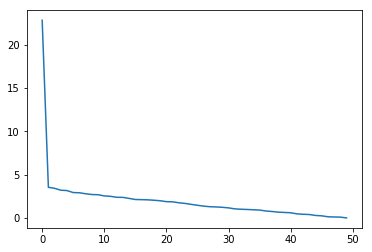

In [11]:
plt.plot(s_perc)
plt.show()

In [12]:
s_perc

array([2.28419915e+01, 3.54298010e+00, 3.42764260e+00, 3.21424790e+00,
       3.16726658e+00, 2.93920920e+00, 2.91475757e+00, 2.79915068e+00,
       2.71200084e+00, 2.68834963e+00, 2.55219237e+00, 2.50457150e+00,
       2.39268729e+00, 2.38306449e+00, 2.26231966e+00, 2.13754414e+00,
       2.12083020e+00, 2.09779988e+00, 2.05144275e+00, 1.99399220e+00,
       1.88937699e+00, 1.86861828e+00, 1.75891955e+00, 1.68457505e+00,
       1.57357253e+00, 1.47223738e+00, 1.36938599e+00, 1.30476091e+00,
       1.27779737e+00, 1.23822486e+00, 1.17031006e+00, 1.05673721e+00,
       1.01160325e+00, 9.85890024e-01, 9.52442319e-01, 9.18755400e-01,
       8.10372629e-01, 7.50481790e-01, 6.76676934e-01, 6.40919856e-01,
       6.06467161e-01, 4.81153412e-01, 4.31649181e-01, 4.03906147e-01,
       2.95127110e-01, 2.51571347e-01, 1.43092458e-01, 1.18865240e-01,
       1.02221302e-01, 1.02471640e-02])

We can see here that most of the information in this matrix is in the first component, adding more components doesn't help much.

In [13]:
k = 2 # N singular vals for reconstruction
B_approx = np.dot(U[:, :k], np.dot(np.diag(s[:k]), V[:k, :]))

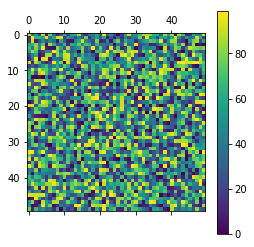

In [14]:
plt.matshow(B)
plt.colorbar()
plt.show()

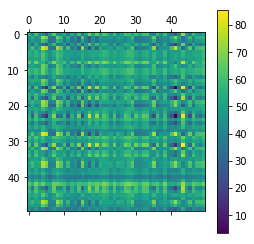

In [15]:
plt.matshow(B_approx)
plt.colorbar()
plt.show()

It's interesting because although there is some information here, it's nostly random noise. 

## Pseudo inverse via SVD

It's also worth noting that we can calculate the pseudo inverse using SVD

$$A = U \Sigma V^T$$ 
$$A^{-1} = (U \Sigma V^T)^{-1}$$ 
$$A^{-1} = V \Sigma^{-1} U^T$$ 

In [16]:
B_pseud = V.T.dot(np.linalg.inv(np.diag(s))).dot(U.T)

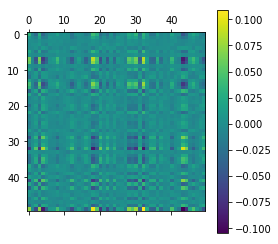

In [17]:
plt.matshow(B_pseud)
plt.colorbar()
plt.show()

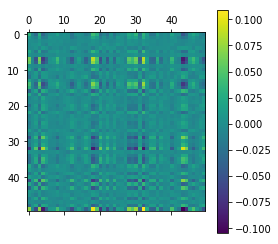

In [18]:
plt.matshow(la.pinv(B))
plt.colorbar()
plt.show()

I didn't think it would actually work but it seems that it has!

## Condition Number of a matrix
If we divide the max value by the min value we can figure out how much info is in a matrix, or at least an indicator of it.

In [19]:
s.max()/s.min()

2229.1037365252096

We want this information to be pretty big, but since this is a matrix of random numbers we can tell that this isn't always true.